# Prediction using Decision Tree Algorithm 
(Level - Intermediate)

## Exploring the data

In [1]:
#Import All Needed Libraries
import pandas as pd
import sklearn.datasets as ds
from sklearn import tree
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
import csv

In [2]:
#Read the Iris.csv data and displaying the first few rows of it
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#display dimensions of the Iris.csv dataframe
df.shape

(150, 6)

In [4]:
#drop unneccessary column 'Id'
df=df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#display dimensions of the Iris.csv dataframe after dropping unnecessary columns
df.shape

(150, 5)

In [6]:
#display useful descriptive statistics for each column of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#display a concise summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Preprocessing of data

In [8]:
#Label Encoder is used to convert categorical data to numerical one
LE= preprocessing.LabelEncoder()
#select all the columns except the last one 'Species', fit them into a machine learning model, then
#transform the model into training and testing data
df.iloc[:, -1]= LE.fit_transform(df.iloc[:, -1])
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


#### Split dataset into Independent Variables (input for the process) and independent ones (output for the process)

In [9]:
#display all the columns except the last one 'Species' (Input)
X = df.iloc[:, :-1]
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [10]:
#display all rows of the last column 'Species' (Output)
y = df.iloc[:,-1]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


#### Split data into training data and testing data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2


## Create Decision Tree Model

In [12]:
dtree=tree.DecisionTreeClassifier()
#train decision tree classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
#predict results of test dataset
y_prediction= dtree.predict(X_test)
print(y_prediction)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]


In [14]:
#retrieve actual dataset
y_test= np.array(y_test)
print(y_test)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]


#### Evaluate the model

In [15]:
#used to calculate percision, recall, and f1-score
from sklearn import metrics
metrics.confusion_matrix(y_prediction, y_test)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [16]:
#measure accuracy of the model
metrics.accuracy_score(y_prediction, y_test)

1.0

In [17]:
#measure performance of the model
print(metrics.classification_report(y_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualizing the Decision Tree

[Text(669.6, 1195.92, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(566.5846153846154, 978.48, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(772.6153846153846, 978.48, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(412.0615384615385, 761.0400000000001, 'petal length (cm) <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(206.03076923076924, 543.6, 'petal width (cm) <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(103.01538461538462, 326.15999999999997, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(309.04615384615386, 326.15999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(618.0923076923077, 543.6, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(515.0769230769231, 326.1599

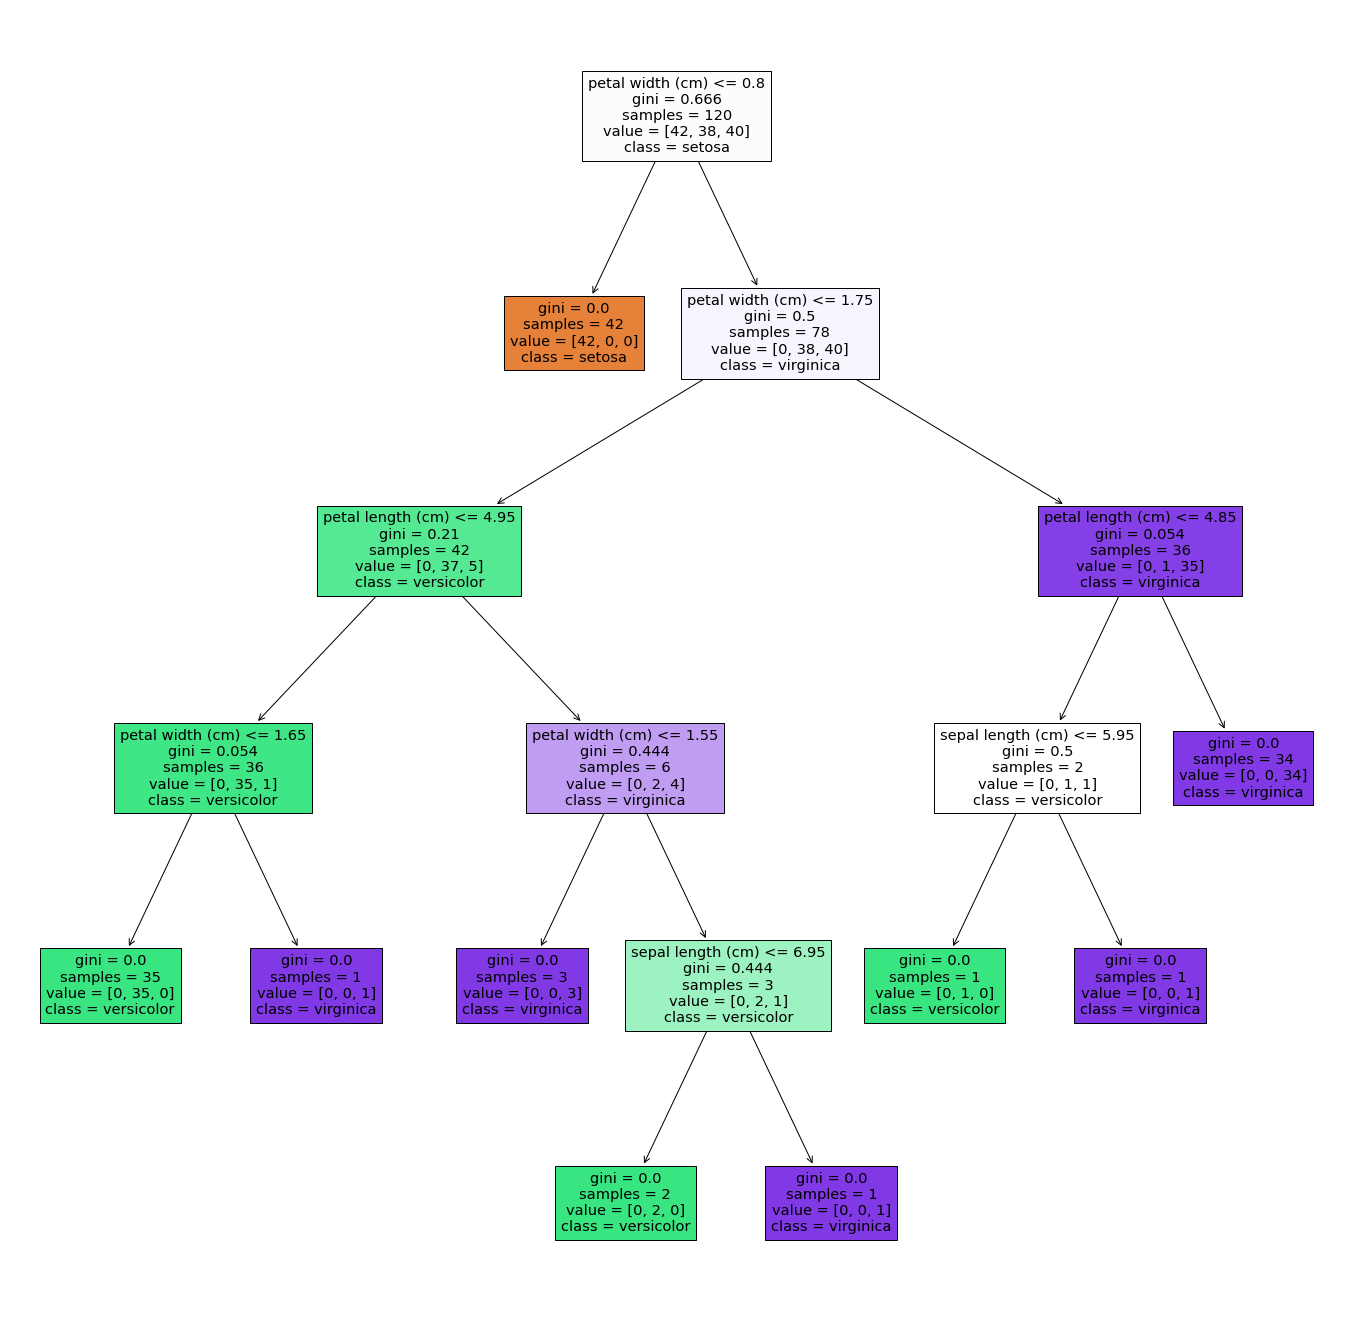

In [21]:
iris=ds.load_iris()
plt.figure(figsize=(24,24))
tree.plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)